In [147]:
import pandas as pd

In [148]:
df = pd.read_csv('download.csv', parse_dates=['dateRep'])

In [149]:
dates = pd.to_datetime(df[['year', 'month', 'day']])

In [150]:
df['date'] = dates

In [151]:
df = df[['date','cases','deaths','countriesAndTerritories','geoId','countryterritoryCode','popData2018']]

In [152]:
df.head()

,date,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-18,51,1,Afghanistan,AF,AFG,37172386.0
1,2020-04-17,10,4,Afghanistan,AF,AFG,37172386.0
2,2020-04-16,70,2,Afghanistan,AF,AFG,37172386.0
3,2020-04-15,49,2,Afghanistan,AF,AFG,37172386.0
4,2020-04-14,58,3,Afghanistan,AF,AFG,37172386.0


In [153]:
df.max()

date                       2020-04-18 00:00:00
cases                                    35527
deaths                                    4928
countriesAndTerritories               Zimbabwe
popData2018                        1.39273e+09
dtype: object

In [154]:
df.loc[df['deaths'] == 1]

,date,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-18,51,1,Afghanistan,AF,AFG,37172386.0
8,2020-04-10,61,1,Afghanistan,AF,AFG,37172386.0
13,2020-04-05,35,1,Afghanistan,AF,AFG,37172386.0
19,2020-03-30,8,1,Afghanistan,AF,AFG,37172386.0
20,2020-03-29,15,1,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...
11510,2020-04-11,1,1,Zambia,ZM,ZMB,17351822.0
11518,2020-04-03,3,1,Zambia,ZM,ZMB,17351822.0
11542,2020-04-10,0,1,Zimbabwe,ZW,ZWE,14439018.0
11543,2020-04-09,1,1,Zimbabwe,ZW,ZWE,14439018.0


In [155]:
germany = df[df['geoId']=='DE']

In [156]:
germany.describe()

,cases,deaths,popData2018
count,110.000000,110.000000,110.0
mean,1249.445455,37.363636,82927922.0
std,2010.871862,77.542735,0.0
min,0.000000,0.000000,82927922.0
25%,0.000000,0.000000,82927922.0
50%,2.000000,0.000000,82927922.0
75%,2450.000000,22.750000,82927922.0
max,6294.000000,315.000000,82927922.0


In [157]:
germany

,date,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
4116,2020-04-18,3609,242,Germany,DE,DEU,82927922.0
4117,2020-04-17,3380,299,Germany,DE,DEU,82927922.0
4118,2020-04-16,2866,315,Germany,DE,DEU,82927922.0
4119,2020-04-15,2486,285,Germany,DE,DEU,82927922.0
4120,2020-04-14,2082,170,Germany,DE,DEU,82927922.0
...,...,...,...,...,...,...,...
4221,2020-01-04,0,0,Germany,DE,DEU,82927922.0
4222,2020-01-03,0,0,Germany,DE,DEU,82927922.0
4223,2020-01-02,0,0,Germany,DE,DEU,82927922.0
4224,2020-01-01,0,0,Germany,DE,DEU,82927922.0


In [158]:
import numpy as np

In [159]:
import matplotlib.pyplot as plt

In [160]:
df.sort_values(by='date')

,date,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
7041,2019-12-31,0,0,Mexico,MX,MEX,126190788.0
10110,2019-12-31,0,0,Sri_Lanka,LK,LKA,21670000.0
8960,2019-12-31,0,0,Romania,RO,ROU,19473936.0
3909,2019-12-31,0,0,France,FR,FRA,66987244.0
2622,2019-12-31,0,0,Croatia,HR,HRV,4089400.0
...,...,...,...,...,...,...,...
4711,2020-04-18,15,5,Honduras,HN,HND,9587522.0
6875,2020-04-18,0,0,Mauritania,MR,MRT,4403319.0
2623,2020-04-18,61,4,Cuba,CU,CUB,11338138.0
8961,2020-04-18,4070,41,Russia,RU,RUS,144478050.0


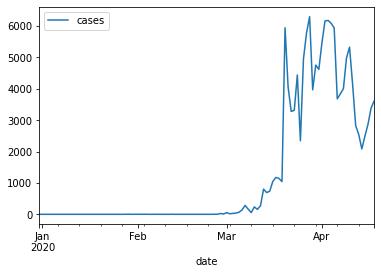

In [161]:
germany.plot(kind='line',x='date', y='cases')

In [162]:
italy = df[df['geoId']=='IT']

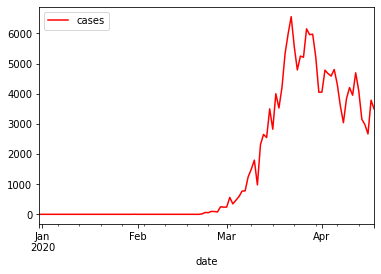

In [163]:
italy.plot(kind='line',x='date', y='cases', color='red')

In [164]:
customDf = pd.merge(germany,italy, on='date')

In [165]:
mask = (customDf['date'] >= '2020-03-01')
customDf = customDf.loc[mask]

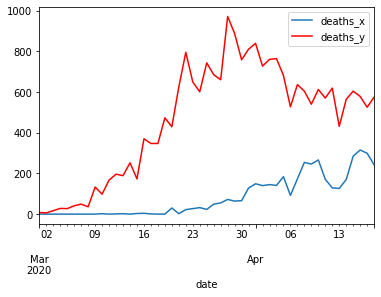

In [166]:
ax = plt.gca()
customDf.plot(kind='line',x='date', y='deaths_x', ax=ax)
customDf.plot(kind='line',x='date', y='deaths_y', color='red', ax=ax)
plt.show()

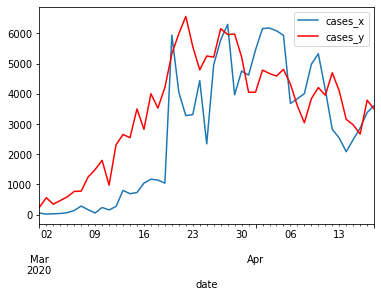

In [167]:
ax = plt.gca()
customDf.plot(kind='line',x='date', y='cases_x', ax=ax)
customDf.plot(kind='line',x='date', y='cases_y', color='red', ax=ax)
plt.show()

In [168]:
mask = (customDf['date'] >= '2020-03-01')

In [169]:
customDf.loc[mask]

,date,cases_x,deaths_x,countriesAndTerritories_x,geoId_x,countryterritoryCode_x,popData2018_x,cases_y,deaths_y,countriesAndTerritories_y,geoId_y,countryterritoryCode_y,popData2018_y
0,2020-04-18,3609,242,Germany,DE,DEU,82927922.0,3493,575,Italy,IT,ITA,60431283.0
1,2020-04-17,3380,299,Germany,DE,DEU,82927922.0,3786,525,Italy,IT,ITA,60431283.0
2,2020-04-16,2866,315,Germany,DE,DEU,82927922.0,2667,578,Italy,IT,ITA,60431283.0
3,2020-04-15,2486,285,Germany,DE,DEU,82927922.0,2972,604,Italy,IT,ITA,60431283.0
4,2020-04-14,2082,170,Germany,DE,DEU,82927922.0,3153,564,Italy,IT,ITA,60431283.0
5,2020-04-13,2537,126,Germany,DE,DEU,82927922.0,4092,431,Italy,IT,ITA,60431283.0
6,2020-04-12,2821,129,Germany,DE,DEU,82927922.0,4694,619,Italy,IT,ITA,60431283.0
7,2020-04-11,4133,171,Germany,DE,DEU,82927922.0,3951,570,Italy,IT,ITA,60431283.0
8,2020-04-10,5323,266,Germany,DE,DEU,82927922.0,4204,612,Italy,IT,ITA,60431283.0
9,2020-04-09,4974,246,Germany,DE,DEU,82927922.0,3836,540,Italy,IT,ITA,60431283.0
